Your objective is to delve into the World Happiness Report dataset, which includes columns like Country, Year, Happiness_Score, GDP_per_Capita, Social_Support, Healthy_Life_Expectancy, Freedom_to_Make_Life_Choices, Generosity, and Perceptions_of_Corruption.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('WorldHappiness.csv')
print(df.head())

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [ ]:
# print(df.isnull().head())
df.isnull().sum()

,0
Country,0
Region,0
Happiness Rank,0
Happiness Score,0
Standard Error,0
Economy (GDP per Capita),0
Family,0
Health (Life Expectancy),0
Freedom,0
Trust (Government Corruption),0


# After checking, we can see that there is no missing values.

Social Support and Happiness:

Employ a Matplotlib scatter plot to investigate the relationship between ‘Social support’ and ‘Score’.

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


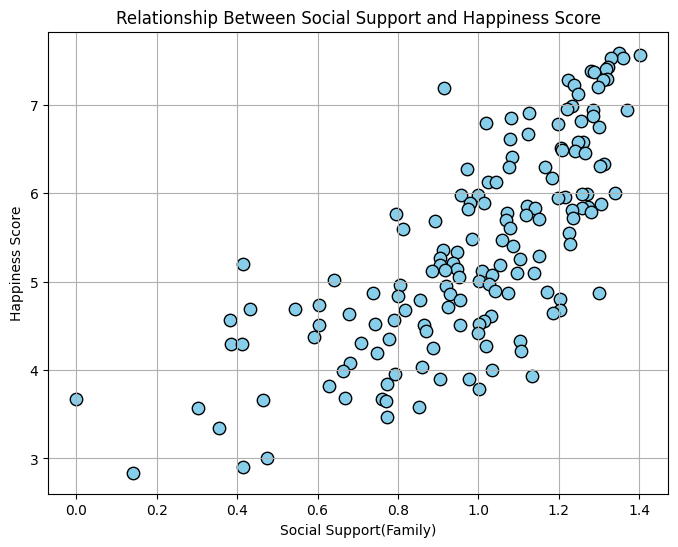

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print(df.columns)

df = pd.read_csv('2015.csv')


plt.figure(figsize=(8, 6))
plt.scatter(df['Family'], df['Happiness Score'], color='skyblue', edgecolor='black', s=80)


plt.title('Relationship Between Social Support and Happiness Score')
plt.xlabel('Social Support(Family)')
plt.ylabel('Happiness Score')

plt.grid(True)

plt.show()

Regional Comparisons of GDP and Health:

Create a Matplotlib subplot that compares ‘GDP per Capita’ and ‘Healthy Life Expectancy’ across different regions.
Use a bar plot for ‘GDP per Capita’ and a line plot for ‘Healthy Life Expectancy’ on the same axes to observe how economic strength relates to health outcomes in different regions.

<ipython-input-41-5dfb88e1e2c0>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(x, rotation=60)


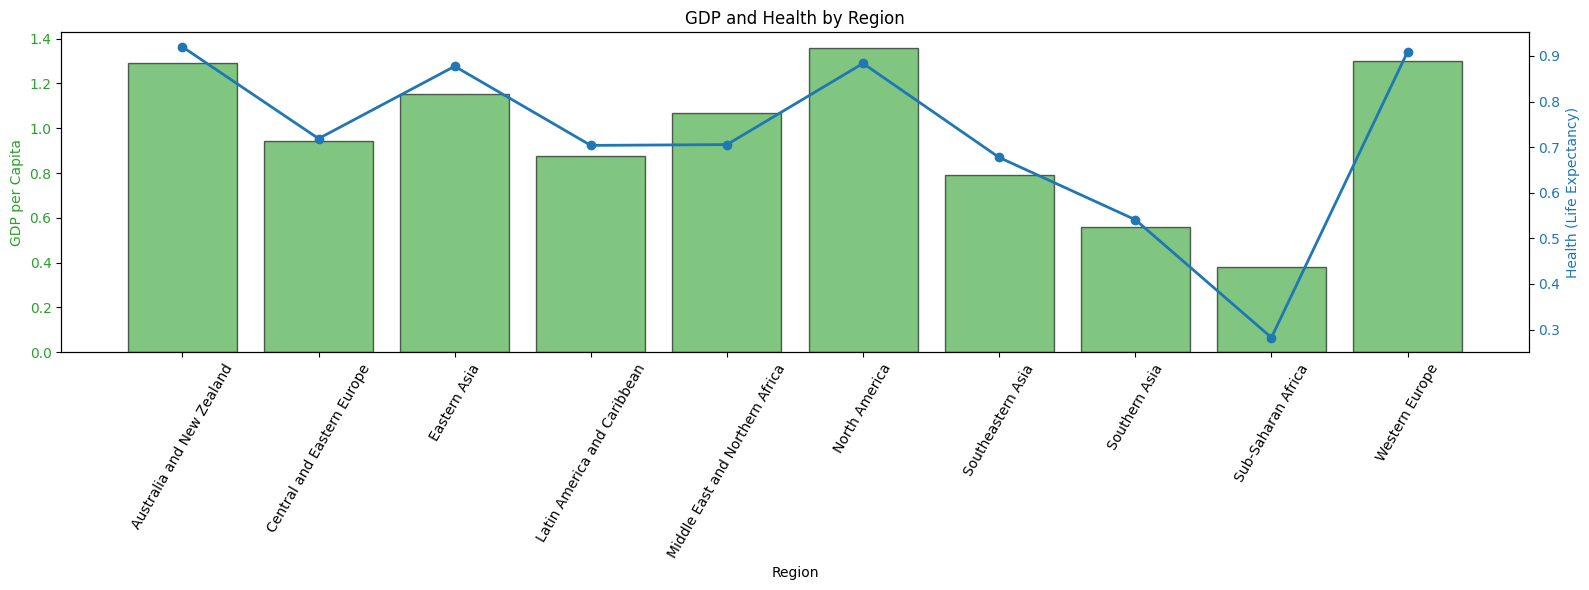

In [ ]:
region_gdp = df.groupby('Region')['Economy (GDP per Capita)'].mean()
region_health = df.groupby('Region')['Health (Life Expectancy)'].mean().reindex(region_gdp.index) #using .reindex(region_gdp.index) to make sure the same order of two index

fig, ax1 = plt.subplots(figsize=(16, 6)) # explanation of fig: the figure’s created by plt.figure() or plt.subplots().You can put multiple subplots or elements on a single fig.It’s created by plt.figure() or plt.subplots(). You can put multiple subplots or elements on a single fig.

x = region_gdp.index

# #bar chart with GDP by region (plt. vs ax.set_: state-based vs. Object-Oriented, OO）
# plt.title('Average GDP per Capita by Region')
# plt.xlabel('Region')
# plt.ylabel('GDP per Capita')
# plt.xticks(rotation=60)
# plt.tight_layout()
color = 'tab:green'
ax1.set_xlabel('Region')
ax1.set_ylabel('GDP per Capita', color=color)
bars = ax1.bar(x, region_gdp.values, color=color, alpha=0.6, edgecolor='black')
ax1.tick_params(axis='y', labelcolor=color) #雙 Y 軸（dual y-axes） 的圖時（例如 bar 和 line 同時顯示在一張圖上）：你可能想讓 bar 對應的 Y 軸是綠色, 而 line 對應的 Y 軸是藍色
ax1.set_xticklabels(x, rotation=60)

# #line chart with Health (life expectancy) by region
# plt.figure(figsize=(10, 6))
# plt.plot(region_health.index, region_health.values, marker='o', color='seagreen', linestyle='-')
# plt.title('Average Health (Life Expectancy) by Region')
# plt.xlabel('Region')
# plt.ylabel('Average Health (Life Expectancy)')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Health (Life Expectancy)', color=color)
line = ax2.plot(x, region_health.values, color=color, marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('GDP and Health by Region')
# plt.xlabel('Region')
# plt.ylabel('Average Value')
# plt.xticks(rotation=60)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()

plt.tight_layout()
plt.show()

### *Conclusions*
- What I observed from the charts above:
1. **Relationship between Social Support and Happiness:**

There is a certain relationship between social support and happiness index, but it is not drastic. Specifically, the more family members there are, the higher the happiness index, but the difference between family members is 0 to 1.4 averagely, so if the number of average family members will be bigger, maybe the positive correlation will be more obvious.

2. **GDP and Life Expectancy Across Regions:**

GDP and life expentency is closely related: the higher GDP level, the longer life expentency is recorded across different regions. As can be seen from the two charts in the same picture, the ups and downs are exactly positive correlated.